# Non Linear Classification

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [25]:
path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/NLS_Group22.txt"

In [26]:
data = pd.read_csv(path, header=None, delimiter=" ")
data = pd.DataFrame(data)
m, n = data.shape
data

,0,1,2
0,-0.266484,0.574908,NaN
1,-0.336049,0.648162,NaN
2,0.886191,1.179274,NaN
3,1.552619,1.225525,NaN
4,1.831822,0.585167,NaN
...,...,...,...
1995,5.862960,-0.063358,NaN
1996,6.226613,4.057052,NaN
1997,-0.727913,5.083307,NaN
1998,-4.949915,-5.809762,NaN


In [32]:
c1x, c1y = [], []
c2x, c2y = [], []
c3x, c3y = [], []

for i in range(500):
    c1x.append(data[0][i])
    c1y.append(data[1][i])

for i in range(501, 1001):
    c2x.append(data[0][i])
    c2y.append(data[1][i])
    
for i in range(1001, 2000):
    c3x.append(data[0][i])
    c3y.append(data[0][i])

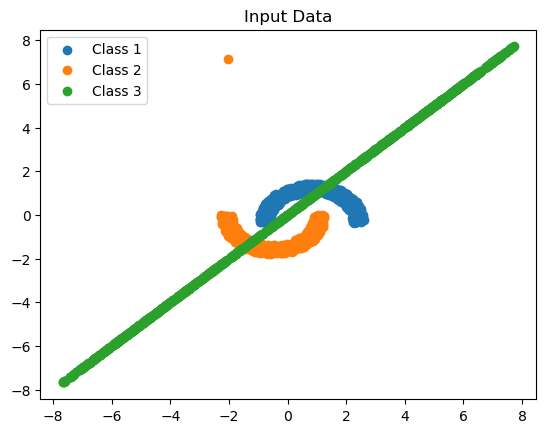

In [34]:
plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)
plt.scatter(c3x, c3y)
plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Input Data")
plt.show()

In [43]:
n = np.arange(len(c1y))
s = pd.Series(c1y, index=n)
class1 = pd.DataFrame(c1x, n)
class1[1] = s.values

n = np.arange(len(c2y))
s = pd.Series(c2y, index=n)
class2 = pd.DataFrame(c2x, n)
class2[1] = s.values

n = np.arange(len(c3y))
s = pd.Series(c3y, index=n)
class3 = pd.DataFrame(c3x, n)
class3[1] = s.values

In [44]:
def seperatedata(data):
    m, n = data.shape
    l1 = int(0.6*m) 
    l2 = l1 + int(0.2*m)
    print(m, l1, l2)
    
    x1, y1 = [], []
    x2, y2 = [], []
    x3, y3 = [], []
    
    k1, k2, k3 = [], [], []

    for i in range(m):
        if i < l1:
            x1.append(data[0][i])
            y1.append(data[1][i])
            k1.append(i)
        elif i > l1 and i <= l2:
            x2.append(data[0][i])
            y2.append(data[1][i])
            k2.append(l1-i)
        else:
            x3.append(data[0][i])
            y3.append(data[1][i])
            k3.append(l2-i)
            
    s = pd.Series(y1, index=k1)
    training = pd.DataFrame(x1, k1)
    training[1] = s.values
    
    s = pd.Series(y2, index=k2)
    validation = pd.DataFrame(x2, k2)
    validation[1] = s.values
    
    s = pd.Series(y3, index=k3)
    test = pd.DataFrame(x3, k3)
    test[1] = s.values

    
    return training, validation, test

In [45]:
training1, validation1, test1 = seperatedata(class1)
print(training1.shape, validation1.shape, test1.shape)

training2, validation2, test2 = seperatedata(class2)
print(training2.shape, validation2.shape, test2.shape)

training3, validation3, test3 = seperatedata(class3)
print(training3.shape, validation3.shape, test3.shape)

500 300 400
(300, 2) (100, 2) (100, 2)
500 300 400
(300, 2) (100, 2) (100, 2)
999 599 798
(599, 2) (199, 2) (201, 2)
